# NGC5055 data

 Φορτώνουμε και βλέπουμε τα δεδομένα για τον NGC5055 (από το [NED](https://ned.ipac.caltech.edu/)).

# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors

from astropy import units as  u
from astropy.cosmology import FlatLambdaCDM
cosmo=FlatLambdaCDM(H0=70, Om0=0.3)

import scipy.constants as cst 

# Functions

In [2]:
def Flambda_to_Fnu(flux_lambda, wl_angst): 
    
    """
    This function transforms flux F_\lambda to F_\nu
    input:
    -flux in units of (some luminosity units) / Angstrom
    -wavelength (spectral axis) in Angstrom
    output:
    -flux in units of (some luminosity units) / Hz
    """
    
    Angstrom = 1e10

    flux_nu = flux_lambda * (wl_angst**2. ) / (cst.c * Angstrom) 
    return flux_nu



# Load galaxy data

In [3]:
route_data = 'data/'
filename = 'NGC5055_UV-MIR_NED.txt'

#-------- NGC5055 (spiral LINER)-----#
colnames=['Wave', 'F_lambda', 'drop','Freq', 'F_nu']   # Angstrom , erg/cm^2/s/A, Hz, W/m^2/Hz 
df = pd.read_csv(route_data+filename, skiprows=3, delim_whitespace=True, names=colnames, header=None)
df.drop('drop', axis=1, inplace=True)
df = df[df['F_lambda']>0]

redshift =  0.001678
D = cosmo.luminosity_distance(redshift)/u.Mpc*u.Mpc.to(u.cm) #in cm

df['L_lambda'] = 4*np.pi*D**2*df['F_lambda']  #erg/s/A
df['L_nu'] = Flambda_to_Fnu(df['L_lambda'].to_numpy(), df['Wave'].to_numpy())   #erg/s/Hz
df

,Wave,F_lambda,Freq,F_nu,L_lambda,L_nu
0,100.23,1.547400e-21,2.991045e+16,5.185341e-39,9.586740e+30,3.212519e+16
1,102.09,2.283600e-21,2.936551e+16,7.938999e-39,1.414778e+31,4.918516e+16
2,104.23,3.073400e-21,2.876259e+16,1.113740e-38,1.904090e+31,6.900050e+16
3,106.17,4.193800e-21,2.823702e+16,1.576851e-38,2.598221e+31,9.769200e+16
4,108.14,5.829200e-21,2.772262e+16,2.273846e-38,3.611414e+31,1.408735e+17
...,...,...,...,...,...,...
2298,342399.59,1.342200e-15,8.755631e+12,5.248836e-26,8.315447e+36,3.251856e+29
2299,344247.72,1.336500e-15,8.708626e+12,5.283119e-26,8.280133e+36,3.273096e+29
2300,346097.09,1.521400e-15,8.662091e+12,6.078810e-26,9.425660e+36,3.766058e+29
2301,347947.62,2.477800e-15,8.616023e+12,1.000629e-25,1.535093e+37,6.199285e+29


# Galaxy data

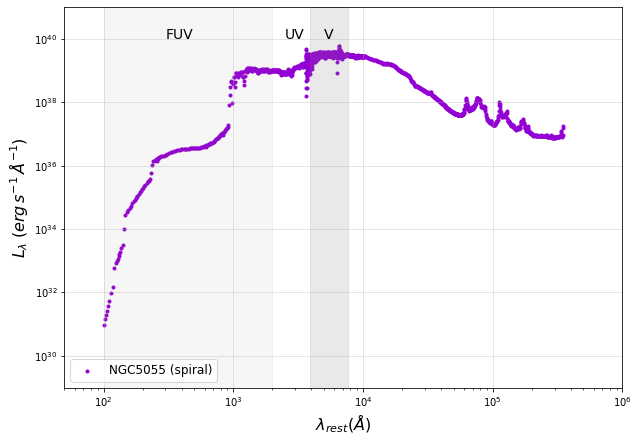

In [4]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(111)
ax1.scatter(df['Wave'],df['L_lambda'], marker = '.',color = 'darkviolet',label = "NGC5055 (spiral)"  )
ax1.axvspan(3900, 7600, alpha=0.17, color = 'gray')  #V
ax1.text(5e3, 1e40,'V',color='k',size=14)
ax1.text(2.5e3, 1e40,'UV',color='k',size=14)
ax1.axvspan(100, 2000, alpha=0.07, color = 'gray')  #FUV
ax1.text(3e2, 1e40,'FUV',color='k',size=14) 
ax1.grid(alpha=0.4)
ylims = [1e29, 1e41]
ax1.set_ylim(ylims)
ax1.set_yscale('log')
xlims = [5e1, 1e6]
ax1.set_xlim(xlims)
ax1.set_xscale('log')
ax1.set_ylabel(r"$ L_{\lambda}  \;(erg \,s^{-1}\,\AA^{-1})$", fontsize = 16)
ax1.set_xlabel(r"$\lambda_{rest}\; (\AA)$", fontsize = 16)
ax1.legend(loc="lower left", fontsize = 12)

plt.show()

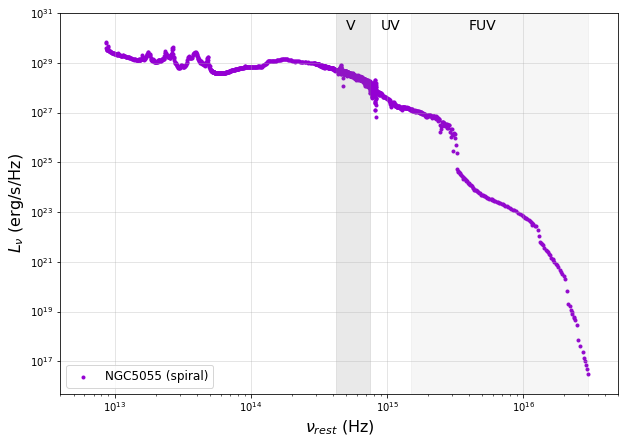

In [5]:
fig = plt.figure(figsize=(10,7))

ax2 = fig.add_subplot(111)
ax2.scatter(df['Freq'],df['L_nu'], marker = '.',color = 'darkviolet',label = "NGC5055 (spiral)"  )
ax2.axvspan(4.2e14, 7.5e14, alpha=0.17, color = 'gray')  #V
ax2.text(5e14, 2e30,'V',color='k',size=14)
ax2.text(9e14, 2e30,'UV',color='k',size=14)
ax2.axvspan(1.5e15, 30e15, alpha=0.07, color = 'gray')  #FUV
ax2.text(4e15, 2e30,'FUV',color='k',size=14)  
ax2.grid(alpha=0.4)
ylims = [5e15, 1e31]
ax2.set_ylim(ylims)
ax2.set_yscale('log')
xlims = [4e12, 5e16]
ax2.set_xlim(xlims)
ax2.set_xscale('log')
ax2.set_ylabel(r"$ L_{\nu}$ (erg/s/Hz)", fontsize = 16)
ax2.set_xlabel(r"$\nu_{rest}$ (Hz)", fontsize = 16)
ax2.legend(loc="lower left", fontsize = 12)

plt.show()